In [1]:
import sys
sys.path.append('../')

In [2]:
from odps import ODPS
from ConfigParser import ConfigParser
config = ConfigParser()
config.read('../odps/tests/test.conf')

access_id = config.get("odps", "access_id")
secret_access_key = config.get("odps", "secret_access_key")
project = config.get("odps", "project")
endpoint = config.get("odps", "endpoint")
        
o = ODPS(access_id, secret_access_key, project=project, endpoint=endpoint)

In [3]:
from odps.pai.context import PAIContext
from odps.pai.algorithms.classifiers import *
from odps.pai.metrics.classification import roc_curve
pai_context = PAIContext(o)

In [4]:
dataset = pai_context.odps_data("ionosphere")
splited = dataset.split(0.6)

labeled_data = splited[0].set_label_field("class")
lr = LogisticRegression()
model = lr.train(labeled_data)

predicted = model.predict(splited[1])
# store_odps is an operational node which will trigger execution of the flow
predicted.store_odps("testOut")

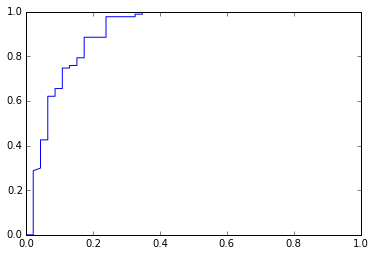

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# roc_curve is also an operational node
fpr, tpr, thresh = roc_curve(predicted, 1, "class")
plt.plot(fpr, tpr)